# Contenido del proyecto <a id='back'></a>

* [Introducción](#intro)
* [Información general de los datos](#info)
* [Conversión de tipos de datos](#datos)
* [Análisis de la información](#analisis)
* [Prueba de hipótesis](#hipótesis)
* [Conclusiones](#conclusiones)

# Introducción <a id='intro'></a>

La base de datos a analizar contiene varias tablas que proporcionan información sobre viajes en taxi en la Ciudad de Chicago. Algunas de las tablas proporcionan información de barrios de Chicago, datos sobre taxos y respectivos viajes y datos sobre el clima de Chicago. Para el análisis del clima de la ciudad, se importan además los datos de una página web que contiene información sobre el clima en Chicago en noviembre de 2017. 

El objetivo del proyecto es encontrar patrones en las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

# Información general de los datos <a id='info'></a>

Importamos las librerías que se consideran necesarias para el análisis de la información.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from scipy.stats import ttest_ind

Cargamos los archivos que contienen los datos a analizar.

In [2]:
taxis=pd.read_csv('/datasets/project_sql_result_01.csv') #cargamos la información de empresas de taxis y números de viajes.

In [3]:
barrios=pd.read_csv('/datasets/project_sql_result_04.csv') #cargamos información de barrios de Chicago donde finalizan los viajes y respectivos promedios de #viajes que terminaron en cada barrio.

In [4]:
clima=pd.read_csv('/datasets/project_sql_result_07.csv') # cargamos información de condiciones climáticas.

Analizamos la información general de cada datasets.

**Para datasets de los taxis.**

In [5]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
taxis.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Los tipos de datos para las columnas del datasets de **taxis** se considera que es apropiado. No se identifican datos ausentes.

In [7]:
taxis['company_name'].duplicated().sum()

0

No se identifican datos duplicados para la columna company_name.

**Para datasets de los barrios.**

In [8]:
barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Los tipos de datos para las columnas del datasets de barrios se consideran correctos. No se identifican valores ausentes.

In [9]:
barrios.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
barrios['dropoff_location_name'].duplicated().sum()

0

No se identifican valores duplicados.

**Para datasets del clima**

In [11]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
clima.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


En el datasets clima, no se identifican datos ausentes. Se considera que el tipo de dato para la columna "start_ts" debe estar en tipo datetime para garantizar el adecuado análisis de la información.

# Conversión de tipos de datos <a id='datos'></a>

El tipo de dato de la columna "start_ts" se cambia a datetime, para garantizar la adecuada manipulación de los datos y prevenir errores en el análisis de la información.

In [13]:
clima['start_ts']=pd.to_datetime(clima['start_ts'],format='%Y.%m.%d') # el tipo de dato para la columna start_ts del dataset clima se pasa a tipo fecha.

In [14]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


El tipo de dato para la columna start_ts del datasets clima se evidencia corregido.

# Análisis de la información <a id='analisis'></a>

Identificamos los barrios en los cuales se presentaron mayores números de finalización de viajes.

In [15]:
barrios.sort_values(by='average_trips',ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


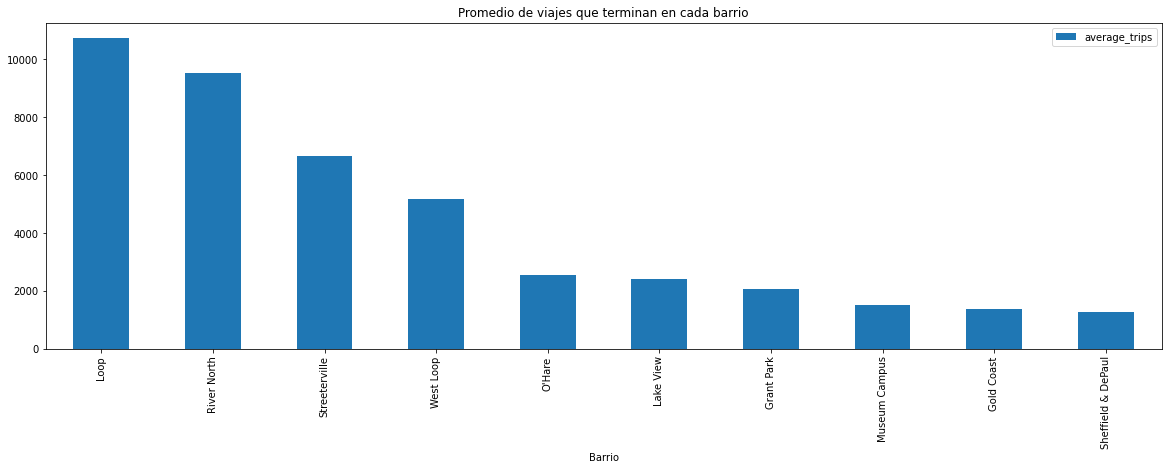

In [16]:
barrios.set_index(
'dropoff_location_name').sort_values(by='average_trips',ascending=False).head(10).plot(kind='bar',figsize=(20,6))
plt.title('Promedio de viajes que terminan en cada barrio')
plt.xlabel('Barrio')
plt.show()

Analizamos la empresas de taxis en las que se presentan mayor número de viajes.

In [17]:
taxis.sort_values(by='trips_amount',ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Graficamos el número de viajes par cada compañía de taxis.

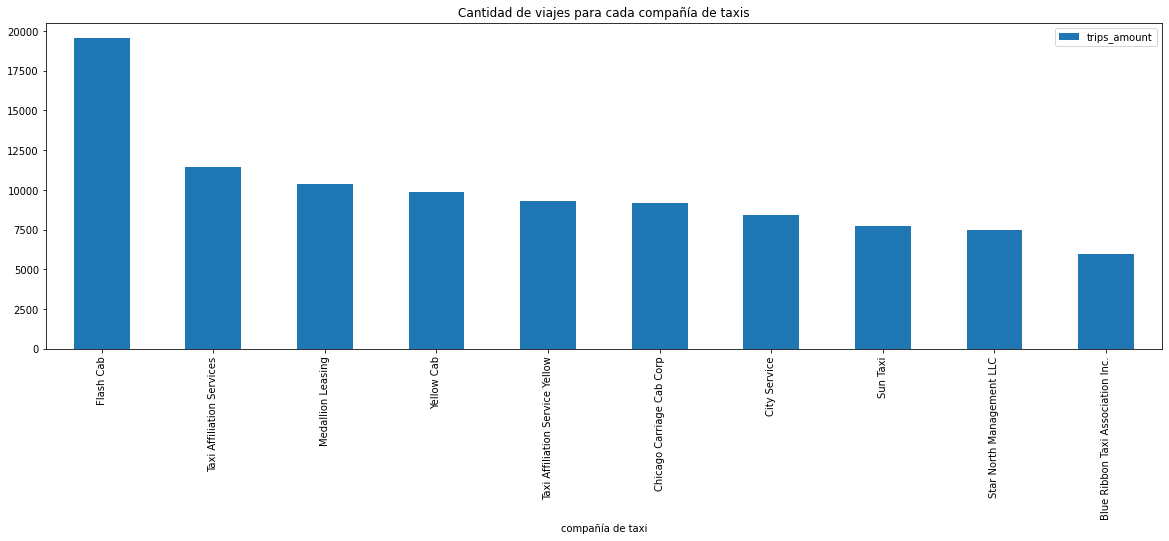

In [18]:
taxis.set_index('company_name').sort_values(by='trips_amount',ascending=False).head(10).plot(kind='bar',figsize=(20,6))
plt.title('Cantidad de viajes para cada compañía de taxis')
plt.xlabel('compañía de taxi')
plt.show()

De acuerdo al gráfico de barras que nos muestra el número de viajes por compañía de taxi, el mayor número de viajes se presenta en las compañías: Flash Cab, Taxi Affiliation Services y Medallion Leasing; posiblemente éstas compañías de taxis cuentan con mas vehículos en circulación en la ciudad de Chicago y por ésta razón los mayores números de viajes se presentan para éstas compañías.

# Prueba de hipótesis <a id='hipótesis'></a>

Para comprobar la hipótesis la hipótesis de que la duración promedio de los viajes desde Loop hasta el Aeropuerto Interncional O'Hare cambia en los días lluviosos, utilizamos el datasets **Clima**

Para la prueba de hipótesis, analizamos la igualdad de las medias de viajes para las duraciones en días lluviosos (bad) y la media para las duraciones en los viajes en los que se no se presentan días lluviosos(Good). Para la comprobación de la prueba de hipótesis utilizamos la prueba T-test, la cual nos permite comparar los promedios.

Para éste caso, **(H0) o hipótesis nula considera que no hay diferencias o cambios al comparar las medias para las duraciones en días lluviosos y no lluviosos.**

En el caso de la hipótesis alternativa(Ha), se considera que la hipótesis nula no se cumple y existe variabilidad entre las medias para las duraciones de viajes en días lluviosos y días no lluviosos.

Calculamos las medias de duraciones de los viajes en los días lluviosos (weather_conditions=Bad).

In [19]:
media_bad=clima[clima['weather_conditions']=='Bad']['duration_seconds']
media_bad

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

Calculamos las medias de duraciones de los viajes en los días lluviosos (weather_conditions=Good).

In [20]:
media_good=clima[clima['weather_conditions']=='Good']['duration_seconds']
media_good

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [21]:
alpha=0.5 #Determinamos el nivel de significancia.

In [22]:
results=st.ttest_ind(media_bad,media_good)

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


De acuerdo con la prueba de hipótesis, rechazamos entonces la hipótesis nula debido a que el valor de pvalue es mucho mayor al valor de alpha; según lo cual, si existe una diferencia entre las medias de las duraciones para los viajes realizados en días lluviosos y no lluviosos.

# Conclusiones <a id='conclusiones'></a>


Inicialmente se importan las librerías que se consideraban necesarias para el cargue y análisis de los datos.

Se importan los datos de los barrios, taxis y viajes e información sobre el Clima en la Cuidad de Chicago para el mes de noviembre del 2017.

Se revisan los tipos de datos, posibles datos ausentes o duplicados en cada dataset; sin embargo no se identifican éste tipo de datos en la base de datos.

Sólo se identifica que el tipo de dato para la columna start_ts ( fecha y hora de recogida del pasajero) no era correcto; ya que se encontraba inicialmente como tipo de dato object y se considera que debía estar en tipo de dato datetime; por lo cual se corrige el tipo de dato sólo para ésta columna.

Se analiza la información por medio de gráficos, que muestran que la mayor cantidad de viajes como punto de destino se presenta en los barrios: Loop, River North y Streeterville.

Por medio de una gráfica de barras se identifica también que el mayor número de viajes en la Cuidad se realiza por parte de las compañías Flash Cab, Taxi Affiliation Services y Medallion Leasing; lo cual posiblemente pueda atribuirse a un mayor número de taxis por parte de éstas compañás que prestan servicio en la Cuidad.

Para comprobar la hipótesis la hipótesis de que la duración promedio de los viajes desde Loop hasta el Aeropuerto Interncional O'Hare difiere en días lluviosos y no lluviosos, utilizamos la prueba T-test; según la cual efectivamente las duraciones en los viajes si varían de acuerdo a la condición climática.